# 越权漏洞
- 越权分类:平行越权和垂直越权,pikachu里的平行越权漏洞都是php代码里只是校验了用户名和密码信息,但是对于会话信息没做校验,垂直越权是没有对会话用户的权限没有做校验.
    1. 平行越权:A和B用户为同级别用户,但是各自不能操作对方个人信息,A用户如果操作了B用户的信息,为平行越权操作
    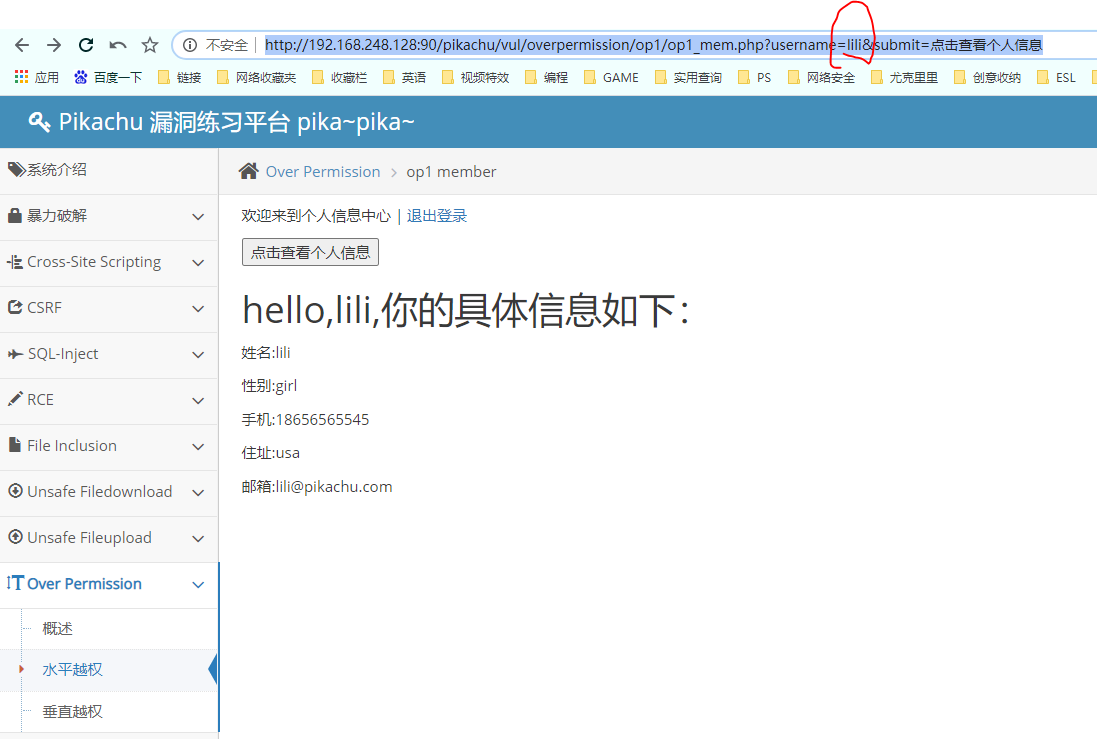
    当我们把url中的lily改为lucy
    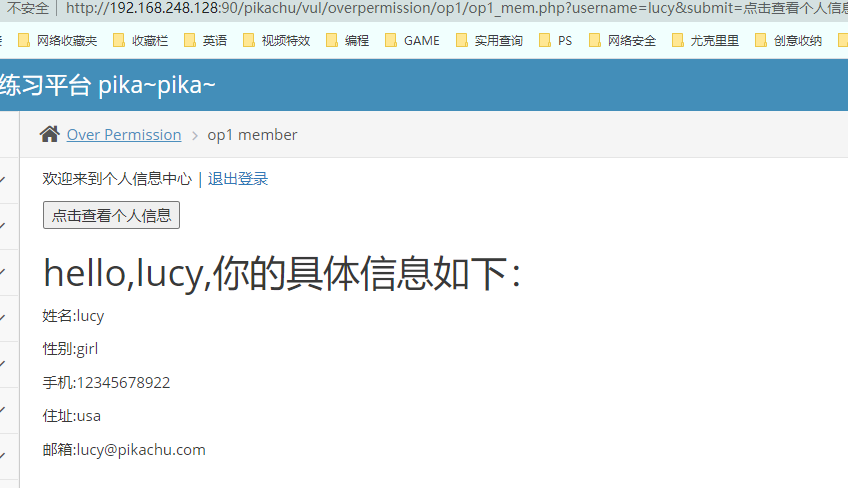
    2. 垂直越权:A权限高于B,但是B可以越权操作A用户的权限的情况称为垂直越权
    实验中,可以在登陆admin账号后,抓到增加用户信息的包和url后,然后切换成普通用户替换相应的url和包达到垂直越权的目的
- 越权漏洞常见的地方一般都在页面需要增删改查的地方

# 逻辑漏洞
常见的逻辑漏洞
交易支付、密码修改、密码找回、越权修改、越权查询、突破限制等各类逻辑漏洞,上面的越权漏洞属于逻辑漏洞大类

# 乌云镜像的案例 : 微信任意用户密码修改漏洞
http://wooyun.2xss.cc/bug_detail.php?wybug_id=wooyun-2012-011720
其中关键的漏洞点就是微信的改密码需要在填入手机验证码后进行递交
在递交后BP抓到的包数据如下
```check=false&phone=18666666666&t=w_password_phone&isemail=0&value=18666666666&method=reset&country=A86&getmethod=web&passw```
在进行多次破解4位数字验证码的时候返回包如下  
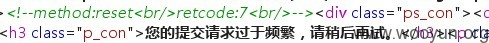
想办法尝试在18666666666后添加不为数字的字符时候绕过了次数限制,对4位数字验证码进行破解.微信程序应该在这里没有对手机号码进行提纯处理,所以可以在后面添加不是数字的字符,然后读取的数据时候又只抓取前面11位.

# 乌云镜像的案例 : 金融服务平台最易贷逻辑漏洞可重置任意用户密码
url http://wooyun.2xss.cc/bug_detail.php?wybug_id=wooyun-2015-0154896

修改A的密码,输入A的手机账号,在发送验证码处填B的手机号,获取验证码后再点击修改,直接改了用户A的密码